In [1]:
from pycaret.classification import *

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 400)
import plotly.express as px
from sklearn.metrics import accuracy_score

In [12]:
setting_01=pd.read_csv('setting_01.csv')

In [13]:
setting_01.dropna(inplace=True)

In [14]:
setting_01

,Denomination,GMU Denom,Model Name,Model Type,Manufacturer Name,Multi Denom,Hold Percentage,Var Hold Pct,Game Hold Percentage,Multi-Game,...,Playable Tickets,CRC Tkt Ecash Disabled,X-Series,Cabinet,Manufacturer,EGM/Roulette,Progressive,Max bet,Roulette,Zone Name
0,0.01,0.01,HELIX GEN8,UPRIGHT,ARISTOCRAT,N,5.75,N,94.25,N,...,N,N,N,Helix Gen 8,Aristocrat,EGM P1 Prog,Fortune Tree (P1),600.0,N,P1
1,0.01,0.01,HELIX GEN8,UPRIGHT,ARISTOCRAT,N,5.75,N,94.25,N,...,N,N,N,Helix Gen 8,Aristocrat,EGM P1 Prog,Fortune Tree (P1),600.0,N,P1
2,0.01,0.01,HELIX GEN8,UPRIGHT,ARISTOCRAT,N,5.75,N,94.25,N,...,N,N,N,Helix Gen 8,Aristocrat,EGM P1 Prog,Fortune Tree (P1),600.0,N,P1
3,0.01,0.01,HELIX GEN8,UPRIGHT,ARISTOCRAT,N,5.75,N,94.25,N,...,N,N,N,Helix Gen 8,Aristocrat,EGM P1 Prog,Fortune Tree (P1),600.0,N,P1
4,0.01,0.01,HELIX GEN8,UPRIGHT,ARISTOCRAT,N,5.75,N,94.25,N,...,N,N,N,Helix Gen 8,Aristocrat,EGM P1 Prog,Fortune Tree (P1),600.0,N,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.01,0.01,VIRIDIAN GEN 7,UPRIGHT,ARISTOCRAT,N,12.12,N,87.88,N,...,N,N,N,Viridian Gen 7,Aristocrat,EGM P1 S/A,Standalone,450.0,N,P1
121,0.01,0.01,VIRIDIAN GEN 7,UPRIGHT,ARISTOCRAT,N,12.12,N,87.88,N,...,N,N,N,Viridian Gen 7,Aristocrat,EGM P1 S/A,Standalone,450.0,N,P1
126,0.01,0.01,VIRIDIAN GEN 7,UPRIGHT,ARISTOCRAT,N,12.25,N,87.75,N,...,N,N,N,Viridian Gen 7,Aristocrat,EGM L9 S/A,Standalone,400.0,N,WH
127,0.01,0.01,VIRIDIAN GEN 7,UPRIGHT,ARISTOCRAT,N,12.20,N,87.80,N,...,N,N,N,Viridian Gen 7,Aristocrat,EGM L9 S/A,Standalone,500.0,N,WH


In [15]:
result=setup(setting_01,target='Zone Name',data_split_shuffle=True,session_id=123,silent=True)

,Description,Value
0,session_id,123
1,Target,Zone Name
2,Target Type,Multiclass
3,Label Encoded,"JL: 0, LG: 1, NR: 2, P1: 3, P2: 4, P6: 5, WH: 6"
4,Original Data,"(124, 30)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9417,0.0000,0.9083,0.9157,0.9228,0.9186,0.9270,0.1070
et,Extra Trees Classifier,0.9417,0.0000,0.9317,0.9400,0.9317,0.9190,0.9273,0.0450
ridge,Ridge Classifier,0.9069,0.0000,0.8842,0.8918,0.8885,0.8746,0.8882,0.0030
rf,Random Forest Classifier,0.9056,0.0000,0.8800,0.8694,0.8778,0.8696,0.8840,0.0540
dt,Decision Tree Classifier,0.9042,0.0000,0.8717,0.8837,0.8859,0.8662,0.8786,0.0050
lr,Logistic Regression,0.8472,0.0000,0.7917,0.8186,0.8157,0.7860,0.8041,0.3340
nb,Naive Bayes,0.8375,0.0000,0.8054,0.8514,0.8213,0.7802,0.8046,0.0050
lda,Linear Discriminant Analysis,0.8347,0.0000,0.7519,0.8383,0.8205,0.7727,0.7955,0.0050
svm,SVM - Linear Kernel,0.7667,0.0000,0.7204,0.7419,0.7323,0.6934,0.7329,0.0060
lightgbm,Light Gradient Boosting Machine,0.6722,0.0000,0.6010,0.6219,0.6198,0.5381,0.5698,0.0140


In [17]:
gbc_model=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8889,0.0000,0.8333,0.8148,0.8444,0.8571,0.8714
4,0.8889,0.0000,0.8333,0.8148,0.8444,0.8571,0.8714
5,0.8889,0.0000,0.9167,0.9444,0.8889,0.8615,0.8750
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8750,0.0000,0.7500,0.7917,0.8250,0.8049,0.8260
9,0.8750,0.0000,0.7500,0.7917,0.8250,0.8049,0.8260


In [18]:
gbc_model_tune=tune_model(gbc_model,search_library='optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.0000,0.7500,1.0000,0.9259,0.8500,0.8645
1,0.8889,0.0000,0.9167,0.9111,0.8840,0.8302,0.8468
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8889,0.0000,0.8333,0.8148,0.8444,0.8571,0.8714
4,0.8889,0.0000,0.8333,0.8148,0.8444,0.8571,0.8714
5,0.8889,0.0000,0.9167,0.9444,0.8889,0.8615,0.8750
6,0.7500,0.0000,0.8000,0.6250,0.6667,0.6800,0.7236
7,0.8750,0.0000,0.9000,0.9375,0.8750,0.8367,0.8542
8,0.8750,0.0000,0.7500,0.7917,0.8250,0.8049,0.8260
9,0.7500,0.0000,0.6250,0.7500,0.7500,0.6190,0.6190


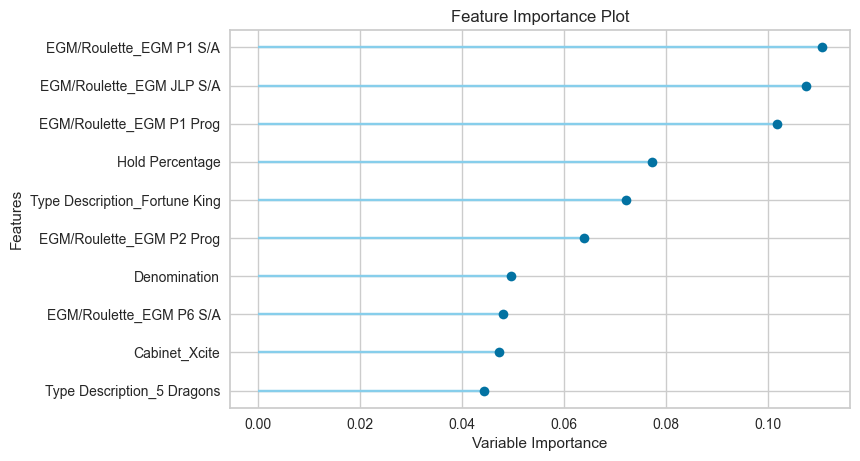

In [19]:
plot_model(gbc_model_tune,plot='feature')

In [20]:
prediction_gbc=predict_model(gbc_model_tune, data=setting_01)

In [21]:
prediction_gbc

,Denomination,GMU Denom,Model Name,Model Type,Manufacturer Name,Multi Denom,Hold Percentage,Var Hold Pct,Game Hold Percentage,Multi-Game,...,X-Series,Cabinet,Manufacturer,EGM/Roulette,Progressive,Max bet,Roulette,Zone Name,Label,Score
0,0.01,0.01,HELIX GEN8,UPRIGHT,ARISTOCRAT,N,5.75,N,94.25,N,...,N,Helix Gen 8,Aristocrat,EGM P1 Prog,Fortune Tree (P1),600.0,N,P1,P1,1.0000
1,0.01,0.01,HELIX GEN8,UPRIGHT,ARISTOCRAT,N,5.75,N,94.25,N,...,N,Helix Gen 8,Aristocrat,EGM P1 Prog,Fortune Tree (P1),600.0,N,P1,P1,1.0000
2,0.01,0.01,HELIX GEN8,UPRIGHT,ARISTOCRAT,N,5.75,N,94.25,N,...,N,Helix Gen 8,Aristocrat,EGM P1 Prog,Fortune Tree (P1),600.0,N,P1,P1,1.0000
3,0.01,0.01,HELIX GEN8,UPRIGHT,ARISTOCRAT,N,5.75,N,94.25,N,...,N,Helix Gen 8,Aristocrat,EGM P1 Prog,Fortune Tree (P1),600.0,N,P1,P1,1.0000
4,0.01,0.01,HELIX GEN8,UPRIGHT,ARISTOCRAT,N,5.75,N,94.25,N,...,N,Helix Gen 8,Aristocrat,EGM P1 Prog,Fortune Tree (P1),600.0,N,P1,P1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.01,0.01,VIRIDIAN GEN 7,UPRIGHT,ARISTOCRAT,N,12.12,N,87.88,N,...,N,Viridian Gen 7,Aristocrat,EGM P1 S/A,Standalone,450.0,N,P1,P1,0.9995
121,0.01,0.01,VIRIDIAN GEN 7,UPRIGHT,ARISTOCRAT,N,12.12,N,87.88,N,...,N,Viridian Gen 7,Aristocrat,EGM P1 S/A,Standalone,450.0,N,P1,P1,1.0000
126,0.01,0.01,VIRIDIAN GEN 7,UPRIGHT,ARISTOCRAT,N,12.25,N,87.75,N,...,N,Viridian Gen 7,Aristocrat,EGM L9 S/A,Standalone,400.0,N,WH,WH,1.0000
127,0.01,0.01,VIRIDIAN GEN 7,UPRIGHT,ARISTOCRAT,N,12.20,N,87.80,N,...,N,Viridian Gen 7,Aristocrat,EGM L9 S/A,Standalone,500.0,N,WH,WH,1.0000


In [22]:
save_model(prediction_gbc,'gbc_setting_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Zone Name',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
 0    Fortune Tree (P1)   600.0        N        P1    P1  1.0000  
 1    Fortune Tree (P1)   600.0        N        P1    P1  1.0000  
 2    Fortune Tree (P1)   600.0        N        P1    P1  1.0000  
 3    Fortune Tree (P1)   600.0        N        P1    P1  1.0000  
 4   

In [23]:
gbc_model=load_model('gbc_setting_model')

Transformation Pipeline and Model Successfully Loaded


In [24]:
prediction_setting=pd.read_csv('setting_test1.csv')

In [25]:
prediction_setting

,Denomination,GMU Denom,Model Name,Model Type,Manufacturer Name,Multi Denom,Hold Percentage,Var Hold Pct,Game Hold Percentage,Multi-Game,...,E Printer,Playable Tickets,CRC Tkt Ecash Disabled,X-Series,Cabinet,Manufacturer,EGM/Roulette,Progressive,Max bet,Roulette
0,0.01,0.01,HELIX GEN8,UPRIGHT,ARISTOCRAT,N,5.75,N,94.25,N,...,N,N,N,N,Helix Gen 8,Aristocrat,EGM P1 Prog,Fortune Tree (P1),600.0,N
1,0.25,0.01,R8TS,MULTISTATION,ALFASTREET,N,2.70,N,97.30,N,...,N,N,N,N,R8TS,Alfastreet,Roulette CMC Z3,Multiplayer,NaN,Y
2,0.01,0.01,AH1,UPRIGHT,BALLY,Y,7.49,N,92.51,N,...,N,N,N,N,AH1,Bally,EGM P1 Prog,Jin Ji Bao Xi P1,880.0,N
3,0.10,0.01,R1SL,MULTISTATION,ALFASTREET,N,2.70,N,97.30,N,...,N,N,N,N,R1SL,Alfastreet,Roulette LG,Multiplayer,20000.0,Y


In [ ]:
prediction=predict_model(gbc_model,data=)